In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img

%config InlineBackend.figure_format = 'retina'

In [2]:
df_covid = pd.read_csv('US_covid.csv') # data from cdc
df_covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [3]:
df_covid.shape

(14940, 15)

In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  14940 non-null  object 
 1   state            14940 non-null  object 
 2   tot_cases        14940 non-null  int64  
 3   conf_cases       4847 non-null   float64
 4   prob_cases       4847 non-null   float64
 5   new_case         14940 non-null  int64  
 6   pnew_case        9676 non-null   float64
 7   tot_death        14940 non-null  int64  
 8   conf_death       5168 non-null   float64
 9   prob_death       5168 non-null   float64
 10  new_death        14940 non-null  int64  
 11  pnew_death       9674 non-null   float64
 12  created_at       14940 non-null  object 
 13  consent_cases    11952 non-null  object 
 14  consent_deaths   12201 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.7+ MB


In [5]:
df_covid['submission_date'] = pd.to_datetime(df_covid['submission_date'])

In [6]:
df_covid['week'] = df_covid['submission_date'].dt.week

In [7]:
df_covid = df_covid[['state','week','new_death']]
df_covid.head()

,state,week,new_death
0,CO,4,0
1,CO,4,0
2,CO,4,0
3,CO,4,0
4,CO,4,0


In [8]:
df_covid['state'].unique()

array(['CO', 'FL', 'AZ', 'SC', 'CT', 'NE', 'IA', 'NM', 'KY', 'WY', 'ND',
       'WA', 'RMI', 'TN', 'AS', 'MA', 'PA', 'NYC', 'OH', 'AL', 'MI', 'VA',
       'CA', 'MS', 'NJ', 'IL', 'TX', 'LA', 'WI', 'GA', 'NV', 'PR', 'IN',
       'OR', 'MD', 'OK', 'NY', 'NC', 'ID', 'UT', 'AR', 'MO', 'DE', 'MN',
       'WV', 'RI', 'DC', 'SD', 'ME', 'KS', 'NH', 'MT', 'HI', 'AK', 'VT',
       'GU', 'VI', 'MP', 'FSM', 'PW'], dtype=object)

In [9]:
df_southern = df_covid.loc[(df_covid['state']=='TX')|
                           (df_covid['state']=='FL')|
                           (df_covid['state']=='GA')|
                           (df_covid['state']=='AL')|
                           (df_covid['state']=='SC')|
                           (df_covid['state']=='MS')|
                           (df_covid['state']=='LA')|
                           (df_covid['state']=='NC')]
df_southern

,state,week,new_death
249,FL,4,0
250,FL,4,0
251,FL,4,0
252,FL,4,0
253,FL,4,0
...,...,...,...
9457,NC,39,39
9458,NC,39,30
9459,NC,39,40
9460,NC,39,53


In [10]:
df_south_grouped = df_southern.groupby(['state','week']).sum()
df_south_grouped.loc['TX']

,new_death
week,
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,5


In [11]:
df_grouped = df_covid.groupby(['state','week']).sum()

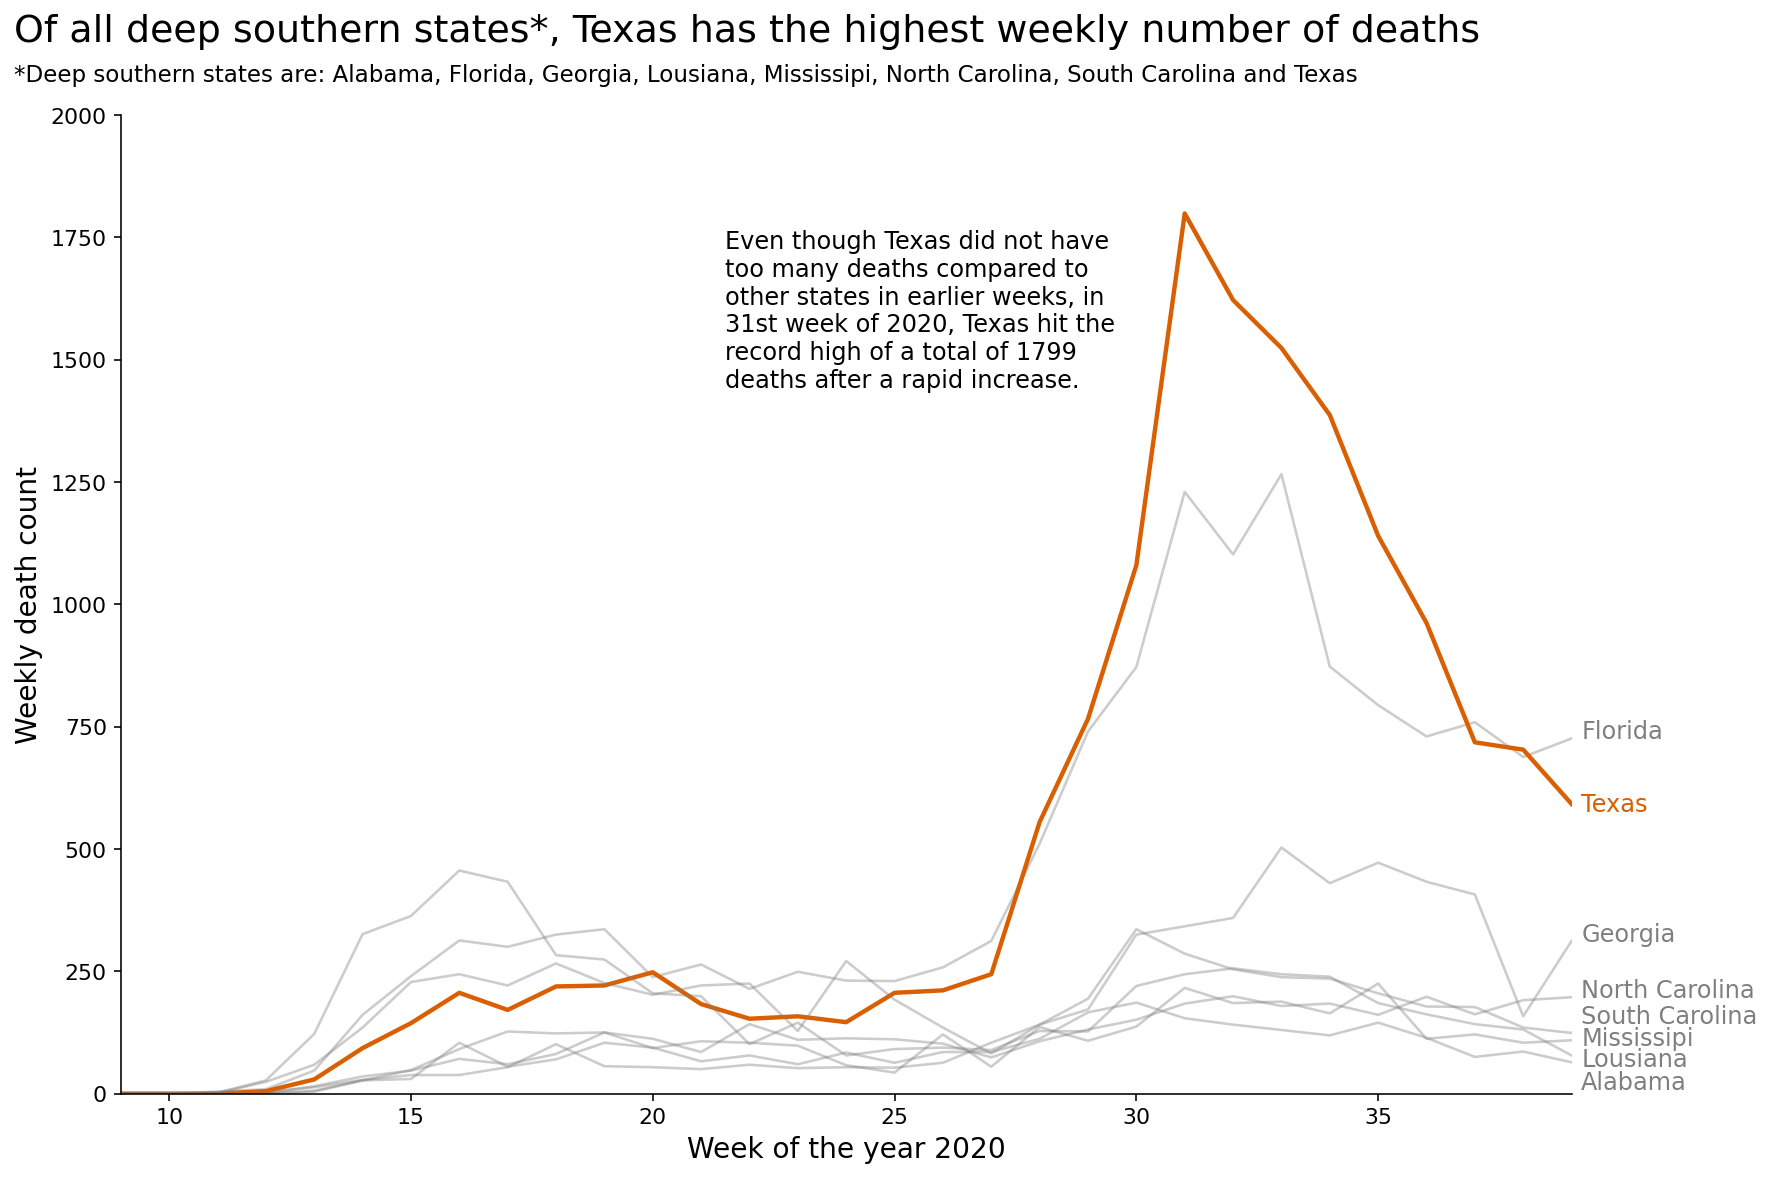

In [75]:
fig, ax = plt.subplots(figsize = (13,9))

states = df_southern['state'].unique()

ax.set_ylim(0,2000)
ax.set_xlim(9,39)

ax.text(6.8,2150,'Of all deep southern states*, Texas has the highest weekly number of deaths', fontsize = 19)
ax.text(6.8,2070,'*Deep southern states are: Alabama, Florida, Georgia, Lousiana, Mississipi, North Carolina, South Carolina and Texas', fontsize = 11.5)

for index, state in enumerate(states):
    color = ('#d95f02' if state == 'TX' else 'gray')
    lw = (2.2 if state == 'TX' else 1.3)
    alpha = (1 if state == 'TX' else 0.4)
    ax.plot(df_south_grouped.loc[state], color = color, alpha = alpha, linewidth = lw)
    

ax.text(21.5, 1600, 'Even though Texas did not have\ntoo many deaths compared to\nother states in earlier weeks, in\n31st week of 2020, Texas hit the\nrecord high of a total of 1799\ndeaths after a rapid increase.',
        verticalalignment='center', horizontalalignment='left', fontsize = 12)

ax.text(39.2,df_south_grouped.loc['TX',39].values[0], 'Texas', fontsize = 12, color = '#d95f02', verticalalignment='center')
ax.text(39.2,df_south_grouped.loc['FL',39].values[0], 'Florida', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['GA',39].values[0], 'Georgia', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['NC',39].values[0], 'North Carolina', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['SC',39].values[0]+20, 'South Carolina', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['MS',39].values[0]-10, 'Mississipi', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['LA',39].values[0]-22, 'Lousiana', fontsize = 12, alpha = .5)
ax.text(39.2,df_south_grouped.loc['AL',39].values[0]-55, 'Alabama', fontsize = 12, alpha = .5)

# Even though Texas did not have too many deaths compared to other states in earlier weeks, in 31st week of 2020, Texas hit the record high of a total of 1799 deaths after a rapid increase.

ax.set_xlabel('Week of the year 2020', fontsize = 14)
ax.set_ylabel('Weekly death count', fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=11)

plt.show()

- Get rid of square area graph idea fully, and change it to a line plot since covid death data is time dependent
- Use weeks on x-axis instead of months to be able to show more detailed graph
- Plot Texas and other Southern States on the graph for comparison
- Use color to bring Texas infront and send other states back, since our main point of interest is Texas's plot
- Add state names near related lines
- Color state names accordingly to be consistent and bring interest on Texas
- Add a title that summarizes the finding from the data
- Add a subtitle to explain which states are considered deep southern for people who might not know
- Add text to explain findings about Texas's weekly covid death data